# Alternate method for Exercise 7

In this document I will try to show how the use of functional methods can make data analysis approachable and understandable while increasing the possible performance in various ways. This neccessiataes a fundamental shift in how the analysis is designed in terms of program structure. This however does not sacrifice any functionality in terms of possible analyses methods in comparison with the widely used object oriented method of writing Analyses.

In [1]:
import sys
import itertools as itt
from include.RandomHelper import check_data_state
check_data_state(directory="./data")

Necessary directories present.


As first step the data should be read in. This is done with the pandas module, a third party data analysis framework for python. The data is read into a `dataframe` object that is defined by the pandas library.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
pd.set_option('display.max_columns', None)

# Background simulation
bkgnd_sim_file_1 = "./data/for_long_analysis/mc_init/MC_2012_ZZ_to_4L_2el2mu.csv"
bkgnd_sim_file_2 = "./data/for_long_analysis/mc_init/MC_2012_ZZ_to_4L_4mu.csv"
bkgnd_sim_file_3 = "./data/for_long_analysis/mc_init/MC_2012_ZZ_to_4L_4el.csv"

# Signal simulation
sig_sim_file_1 = "./data/for_long_analysis/mc_init/MC_2012_H_to_ZZ_to_4L_2el2mu.csv"
sig_sim_file_2 = "./data/for_long_analysis/mc_init/MC_2012_H_to_ZZ_to_4L_4mu.csv"
sig_sim_file_3 = "./data/for_long_analysis/mc_init/MC_2012_H_to_ZZ_to_4L_4el.csv"

bkgnd_sim_2el2mu = pd.read_csv(bkgnd_sim_file_1, delimiter=";")
bkgnd_sim_4mu = pd.read_csv(bkgnd_sim_file_2, delimiter=";")
bkgnd_sim_4el = pd.read_csv(bkgnd_sim_file_3, delimiter=";")
sig_sim_2el2mu = pd.read_csv(sig_sim_file_1, delimiter=';')
sig_sim_4mu = pd.read_csv(sig_sim_file_2, delimiter=';')
sig_sim_4el = pd.read_csv(sig_sim_file_3, delimiter=';')

## Discussion of the data
The data described here is data generated by mote-carlo event generators and is split into background and signal simulation. To optimize our analysis we will use the monte-carlo data to make sure that the analysis is not artificially tuned to find a peak in the real data but only find a peak that we put there (in the simulation). If the peak is not there in the data we can be sure that our analysis would have picked it up and therefore can say if there was a peak at the predicted location or not without having to worry about if the analysis was skewed to find the peak because you thought there ought to be one and then made the analysis to produce data to fit your conclusion.

The pandas dataframes that we loaded currently only describe the background (the background that we expect according to the predictions of the standard model). More precicely they describe the background that is expected in the 2e2mu channel. the other dataframe de

First let's examine the data in the dataframe

In [3]:
bkgnd_sim_2el2mu.head(5)

,run,event,luminosity_section,muon_energy,muon_px,muon_py,muon_pz,muon_charge,muon_relPFIso,muon_dxy,muon_dz,muon_SIP3d,electron_energy,electron_px,electron_py,electron_pz,electron_charge,electron_relPFIso,electron_dxy,electron_dz,electron_SIP3d
0,194533.0,846714,2823,"55.3949,35.6495","-48.399,31.2184","24.7739,-15.0449","-10.6009,8.36253","-1,1","0.0209805,0.0524248","-0.00105939,-0.00198611","0.00580479,-0.000121758","1.6412,0.661312","254.196,36.8009","18.0862,-12.0845","-48.5142,24.8936","-248.867,-24.2607","-1,1","0.0250167,0.0712457","-0.0028464,0.000602746","-0.00391345,0.00170042","0.47657,0.431616"
1,194533.0,846715,2823,"46.227,17.1694","-2.8323,11.2507","-13.9613,-1.2918","-43.9771,-12.9046","-1,1","0.191416,0.17468","0.00761235,-0.000309401","-0.00194986,0.00129964","0.946415,0.308535","82.9044,11.4583","1.71208,-8.54741","28.2926,2.83502","-77.9085,7.08491","-1,1","0.15352,0.515702","-0.00206888,0.00300649","-0.00538221,7.12868e-05","0.937364,0.413622"
2,194533.0,846723,2823,"19.461,10.3101","11.2609,9.16698","-10.3577,-2.32848","-12.0261,4.10262","-1,1","0.155083,0.221734","0.000703356,0.00115165","0.000846168,-0.00065684","0.296126,0.240591","42.9922,71.6306","-16.5883,5.92063","38.9813,-30.8763","-7.32215,-64.3627","-1,1","0.103053,0.0723279","-0.000581222,-0.023985","0.00161887,0.0172354","0.369838,4.44646"
3,194533.0,846753,2823,"8.09622,7.72517","0.0821112,-2.40281","6.51906,-6.02051","4.79925,4.20085","-1,1","0.216925,0.41674","0.000483781,-0.00335737","-0.00433865,-0.00260739","0.973179,0.868803","39.5647,98.4103","35.2052,-31.9606","18.029,-9.41048","0.956613,92.5988","1,-1","0.1432,0.049916","0.00165894,-0.000320531","0.0132108,0.00052476","1.92044,0.0866598"
4,194533.0,846763,2823,"71.6791,80.8522","64.102,25.6134","-26.1167,41.6729","18.6209,64.3769","1,-1","0.014919,0.013307","-0.000143862,-0.000591512","-0.00487695,0.00341611","1.44616,0.757034","81.314,11.1153","-78.6539,-10.3513","-11.2899,-3.73267","17.2646,-1.57127","1,-1","0.0136104,0.250511","-0.000410155,-0.00214753","0.00174084,-0.00185153","0.465797,0.454134"


In [4]:
bkgnd_sim_4mu.head(5)

,run,event,luminosity_section,muon_energy,muon_px,muon_py,muon_pz,muon_charge,muon_relPFIso,muon_dxy,muon_dz,muon_SIP3d
0,194533.0,1142211,3809,"52.8881,104.397,29.9594,60.5544","-49.2137,16.0997,24.2971,14.3324","0.527564,-27.1821,11.0576,-1.76615","-19.3616,99.5022,-13.599,58.8072","1,-1,-1,1","0.0296542,0,0.0445055,0","-0.000377091,-0.000857253,0.00163948,-0.00102962","-0.000987451,0.00553847,0.000673754,-0.00563673","0.341185,1.17472,0.74423,0.727535"
1,194533.0,1142219,3809,"113.521,30.6528,11.4094,9.06379","37.3417,-30.5574,-3.5702,-7.26697","-15.5895,2.03743,8.37685,-2.60909","106.064,-1.29509,-6.87345,-4.74604","-1,1,1,-1","0.0125911,0.0117654,0.0899817,0.248405","0.000726053,-0.000136719,0.00150134,-0.00245663","-0.00287983,-0.000185169,0.00946114,0.00240733","0.441156,0.103343,1.74382,0.729126"
2,194533.0,1142220,3809,"37.5417,32.4731,12.4247,10.6322","-2.73565,7.73404,-6.42318,-4.64318","-32.3749,29.0231,10.0461,9.51578","-18.8082,12.3425,3.49,-0.961091","-1,1,-1,1","0.055162,0.188471,0.100481,0.0632636","0.000818172,0.00046863,0.00134882,-0.00210051","0.000417443,0.00251968,-0.00210166,0.00386756","0.284802,0.838615,0.697662,0.928048"
3,194533.0,1142228,3809,"264.068,79.0522,66.5292,86.7354","99.6408,-69.2727,-1.5023,-1.36519","-14.9597,13.4225,36.1747,-25.441","244.09,35.6422,55.8145,82.9091","1,1,-1,-1","0.0194944,0.023523,0.051396,0.0","-0.000898767,-0.000213138,-0.00100135,0.00651469","0.00257914,-0.00103711,-0.00125057,-0.0108969","0.617079,0.401096,0.416188,1.9014"
4,194533.0,1142229,3809,"56.8948,40.0339,28.6141,21.4495","27.7498,-24.7057,9.16045,-5.26999","-28.8856,18.0678,8.47077,6.4065","40.4052,25.8047,25.7505,19.7801","-1,1,-1,1","0,0.00768358,0.0969734,0","-0.000252906,-0.000368003,0.00109531,0.000284646","-0.00435722,0.00268917,-0.000446212,0.00316748","1.24902,0.757682,0.208022,0.445693"


In [5]:
type(bkgnd_sim_2el2mu['muon_energy'][0])

str

As you can see the some columns have been parsed as strings. We need to fix that and convert the strings to lists of floating point numbers. Depending on a few things there are (more or less) two approaches that can be used to perform this step and all further steps of the data processing.
1. The first method is using a functional programming style. This means that as a first step a set of functions are applied that act on one single event, taking in the entire event, somehow modifying it and then returning that modified event. These functions will then be used with pythons internal filter and map methods. This is a data-flow centric approach where, using map and filter, the functions are combined into a data pipeline and then the data is fed through the pipeline. It uses iterators as central objects for the creation of the pipeline that then feed the data through one element at a time. This document will focus on the this first approach.

2. The second method is an approach that is more like a spreadsheet. The original data is still kept and if a quantity needs to be calculated or some subset of the data needs to be altered for each and every event (such as the parsing of the string into an array of floats) then either a column is modified or a new column is added to the table. Further more the data in the table can be aggregated in various ways to "answer questions about the data" (that was using data science speak). This approach does not really think about "flows" of data but treats everything like a giant spreadsheet.

# The functional / data-flow approach
---
So for this part I will demonstrate the data-flow approach using python iterators and the filter/map functions from python's core

First of all we need to transform the data of the pandas dataframe into an iterator so that we can apply all further operations using map and filter (and a few other neat functions that are provided in the `itertools` module of the python standard library (these are a few functions that do neat things with iterators))

But you legitamely might be asking what an iterator actually is. And the technical answer to that question is:

>An iterator is something you can call next() on as in `next(something)`. By definition that something is an iterator

Let me note that `next()` is not an attribute call here but an [built in function](https://docs.python.org/3/library/functions.html) of python. This is part of what makes iterators somewhat special in python.

In less technical terms, an iterator is something that can produce a value of a certain structure (or type more precicely). That means if we have the iterator `something` and `next(something)` produces a `tuple(int, float, str)` then any subsequent calls should produce a `tuple(int, float, str)`. I say should here because there are exceptions to this but that will not be discussed here. If the iterator can't return anything anymore it raises the `StopIteration` exception, which essentially signals to the pipeline that no more data is coming.

Iterators are essentially abstractions of lists. And sure enough a list in python is an iterator (anthing that can be used in a `for` loop is an iterator because 'under the hood' the for loop goes through an iterator one by one and applies whatever is specified in the for loop to each item it gets from the iterator. The difference is that iterators don't neccesarily need to be lists, they just need to know how to produce the next item.

Let's look at a typical thing that python newcomers tend to write:

```python
data = [1, 2, 3, 4, 5, 6]
for i in range(len(data)):
    data[i] += 4
```
Now we could think that `range(len(data))` is a list but it is not, as discussed it is an iterator. because range knows when to stop and how to generate the next item from the current one (in this case it adds `1` to the current count) and returns it when `next()` is called on it.

A similar thing can be done for random numbers, instead of fillig an array with random numbers an iterator can be used because the function that generates the random numbers must allways know how to generate the next random number from some internal state. So we could generate the next number exactly and only when we need it. This eliminates the need to keep massive amounts of random numbers in the main memory and makes programs a lot more recource efficient (with some caveats I won't go into). Essentially the only thing we need to be able to do is somehow 'pause' the random number function right after generating a random number and hit the proverbial 'play' button as soon as we want the next number and hit 'pause' again right after the number was generated. This way of writing a function has already been done for many things in python so I won't go into it here [they are called 'generators' just fyi](https://docs.python.org/3/glossary.html#term-generator).

For more information you can also read [this document on functional programming in python](https://docs.python.org/3/howto/functional.html)

The thing this enables is to wrap iterators around each other and we will allways get back an interator. This is what the `map` and `filter` methods do.
Let's look at what happens when we have an example iterator (I'll use a simple list here as the iterator but it can easily be something different as long as it is an iterator) that returns a tuple of 3 numbers and that is wrapped with some map and filter methods.

In [6]:
def add_first_two_nums(elem):
    return (elem[0], elem[1], elem[2], elem[0]+elem[1])

def sum_over_10(elem):
    return True if elem[3] > 10 else False
   
def sub_3rd_from_1st(elem):
    return (elem[0], elem[1], elem[2], elem[3], elem[0]-elem[2])

def negative_difference(elem):
    return True if elem[4] < 0 else False

data = [(1,2,3), (4,5,6), (7,8,9), (3,2,1), (6,5,4), (9,8,7), (15, 0, 2)]
data1 = map(add_first_two_nums, data)
filtered_data1 = filter(sum_over_10, data1)
data2 = map(sub_3rd_from_1st, filtered_data1)
filtered_data2 = filter(negative_difference, data2)
filtered_data2

As you can see `filtered_data2` is not a list of tuples, which I would have expected if I had not known better. As I said before what we have built here is an iterator, not the data. we can however call `next()` on `filtered_data2`

In [7]:
next(filtered_data2)

(7, 8, 9, 15, -2)

which gives an item and as we can see it has 5 numbers as part of it. The fourth element is the sum of the first two elements (just as we have specified) and the last element is the difference between the first and third element. We can also see that the third element is larger than 10 and the fourth element is negative so the data also satisfies all our criteria that we defined in the filters. It is also not the first element of the sequence but the first element of the list that satisfies all criteria that we applied.

As this is a pipeline, the sequence of operations is important any element that does not satisfy the first requirement is dropped at the first filter so cant even reach the second filter so even if it would pass the requirements of the second filter it won't be shown (just as water in a stream that is used or diverted can't be used downstream of the point of diversion/use). This may be obvious but I wanted to point this out just in case.

calling `next()` again will subsequently result in either the next element that satisfies the all filteres or in a `StopIteration` exception.

In [8]:
next(filtered_data2)

StopIteration: 

As there is no further data that meets the requirements `next()` raises an exception of the aforementioned type.

It is also important to note that iterators are 'consumed' i.e. once the `StopIteration` exeption was raised by an iterator it can no longer be used. This also applies to all iterators that are passed to a subsequent iterator. So in our case `filtered_data1` will also raise a `StopIteration` exception even though we have not called `next()` explicitly on it (`next()` was implicitly called by the `data2` iterator on which `next()` was implicitly called by the `filtered_data2` iterator which we explicitly called `next()` on).

But just to be sure:

In [9]:
next(filtered_data1)

StopIteration: 

Just as expected, we get an `StopIteration` exception.

The [itertools](https://docs.python.org/3/library/itertools.html) module of the standard library has a few iterators that take on the role of various 'flow management' tasks like splitting an iterator into two iterators or repeating a variable a few times, accumulate things and other tasks. This module is really useful and is definitely better than building your own iterator for a problem. Remember all these iterators can be chained to make more complex iterators that can then be reused on different data.

So lets start with the actual task. First of as before, we need to parse all entries that are strings into numpy arrays. I say numpy arrays explicitly because I am planning to use the methods defined for numpy arrays. Before that however we need to transform the dataframe into an iterator over the rows (events) of the dataframe. Thankfully pandas already came with that.

In [10]:
# transform the dataframe into an iterator
data = bkgnd_sim_2el2mu.iterrows()

In [11]:
next(data)

(0,
 run                                    194533
 event                                  846714
 luminosity_section                       2823
 muon_energy                   55.3949,35.6495
 muon_px                       -48.399,31.2184
 muon_py                      24.7739,-15.0449
 muon_pz                      -10.6009,8.36253
 muon_charge                              -1,1
 muon_relPFIso             0.0209805,0.0524248
 muon_dxy              -0.00105939,-0.00198611
 muon_dz               0.00580479,-0.000121758
 muon_SIP3d                    1.6412,0.661312
 electron_energy               254.196,36.8009
 electron_px                  18.0862,-12.0845
 electron_py                  -48.5142,24.8936
 electron_pz                 -248.867,-24.2607
 electron_charge                          -1,1
 electron_relPFIso         0.0250167,0.0712457
 electron_dxy           -0.0028464,0.000602746
 electron_dz            -0.00391345,0.00170042
 electron_SIP3d               0.47657,0.431616
 Name: 0,

As we can see here from the first event the object returned from the iterator is a tuple where the first entry is an int (the index of the row) and the secon d element is a series containing the entries of that row. We now need to parse everything that is a string into a numpy array

In [12]:
# function that parses all strings into lists
def parse_strings(event):
    ed = event[1]
    ed['muon_energy'] = np.array([float(e) for e in ed['muon_energy'].split(',') if e != ''])
    ed['muon_px'] = np.array([float(e) for e in ed['muon_px'].split(',') if e != ''])
    ed['muon_py'] = np.array([float(e) for e in ed['muon_py'].split(',') if e != ''])
    ed['muon_pz'] = np.array([float(e) for e in ed['muon_pz'].split(',') if e != ''])
    ed['muon_charge'] = np.array([float(e) for e in ed['muon_charge'].split(',') if e != ''])
    ed['muon_relPFIso'] = np.array([float(e) for e in ed['muon_relPFIso'].split(',') if e != ''])
    ed['muon_dxy'] = np.array([float(e) for e in ed['muon_dxy'].split(',') if e != ''])
    ed['muon_dz'] = np.array([float(e) for e in ed['muon_dz'].split(',') if e != ''])
    ed['muon_SIP3d'] = np.array([float(e) for e in ed['muon_SIP3d'].split(',') if e != ''])
    ed['electron_energy'] = np.array([float(e) for e in ed['electron_energy'].split(',') if e != ''])
    ed['electron_px'] = np.array([float(e) for e in ed['electron_px'].split(',') if e != ''])
    ed['electron_py'] = np.array([float(e) for e in ed['electron_py'].split(',') if e != ''])
    ed['electron_pz'] = np.array([float(e) for e in ed['electron_pz'].split(',') if e != ''])
    ed['electron_charge'] = np.array([float(e) for e in ed['electron_charge'].split(',') if e != ''])
    ed['electron_relPFIso'] = np.array([float(e) for e in ed['electron_relPFIso'].split(',') if e != ''])
    ed['electron_dxy'] = np.array([float(e) for e in ed['electron_dxy'].split(',') if e != ''])
    ed['electron_dz'] = np.array([float(e) for e in ed['electron_dz'].split(',') if e != ''])
    ed['electron_SIP3d'] = np.array([float(e) for e in ed['electron_SIP3d'].split(',') if e != ''])
    return (event[0], ed)

In [13]:
parsed_data = map(parse_strings, data)

In [14]:
next(parsed_data)

(1,
 run                                       194533
 event                                     846715
 luminosity_section                          2823
 muon_energy                    [46.227, 17.1694]
 muon_px                       [-2.8323, 11.2507]
 muon_py                      [-13.9613, -1.2918]
 muon_pz                     [-43.9771, -12.9046]
 muon_charge                          [-1.0, 1.0]
 muon_relPFIso                [0.191416, 0.17468]
 muon_dxy              [0.00761235, -0.000309401]
 muon_dz                [-0.00194986, 0.00129964]
 muon_SIP3d                  [0.946415, 0.308535]
 electron_energy               [82.9044, 11.4583]
 electron_px                  [1.71208, -8.54741]
 electron_py                   [28.2926, 2.83502]
 electron_pz                  [-77.9085, 7.08491]
 electron_charge                      [-1.0, 1.0]
 electron_relPFIso            [0.15352, 0.515702]
 electron_dxy           [-0.00206888, 0.00300649]
 electron_dz           [-0.00538221, 7.12868e-

now that all the data will be parsed when it emerges from this transformation we can start doing the actual data crunching.

When thinking a bit about the problem we want to solve, it is possible to see that the organisation of the data is far from optimal. By rearranging the data into 4-vectors for the muons and electrons we can use general purose functions to calculate things like the center of mass and the angles phi and theta. So the best idea is to restructure the data so that we can potentally reuse code that may allready exist to calculate quantities on 4-vectors.

In [15]:
# reorganizing the data
def build_4_vectors(event):
    # ed stands for event-data
    ed = event[1]
    # transformed event-data (this will contain the data in the structure that we want)
    ted = {}
    e_keys = ['electron_energy', 'electron_px', 'electron_py', 'electron_pz']
    mu_keys = ['muon_energy', 'muon_px', 'muon_py', 'muon_pz']
    mu_vecs = np.array([[me, mpx, mpy, mpz] for me, mpx, mpy, mpz in zip(ed[mu_keys[0]], ed[mu_keys[1]], ed[mu_keys[2]], ed[mu_keys[3]])])
    e_vecs = np.array([[ee, epx, epy, epz] for ee, epx, epy, epz in zip(ed[e_keys[0]], ed[e_keys[1]], ed[e_keys[2]], ed[e_keys[3]])])
    ted['e_fourvector'] = e_vecs
    ted['mu_fourvector'] = mu_vecs
    
    # copy the rest of the values as long as they are not redundant
    for key in ed.keys():
        if key not in e_keys and key not in mu_keys:
            ted[key] = ed[key]
        
    return (event[0], ted)

 In this definition I have used the [zip](https://docs.python.org/3/library/functions.html#zip) function that also works on iterators (and iterables (iterables are things that can trivially be transformed into an iterator (like lists))) please look up what it does at the link provided.

In [16]:
vectorized_data = map(build_4_vectors, parsed_data)

In [17]:
next(vectorized_data)

(2,
 {'e_fourvector': array([[ 42.9922 , -16.5883 ,  38.9813 ,  -7.32215],
         [ 71.6306 ,   5.92063, -30.8763 , -64.3627 ]]),
  'mu_fourvector': array([[ 19.461  ,  11.2609 , -10.3577 , -12.0261 ],
         [ 10.3101 ,   9.16698,  -2.32848,   4.10262]]),
  'run': 194533.0,
  'event': 846723,
  'luminosity_section': 2823,
  'muon_charge': array([-1.,  1.]),
  'muon_relPFIso': array([0.155083, 0.221734]),
  'muon_dxy': array([0.00070336, 0.00115165]),
  'muon_dz': array([ 0.00084617, -0.00065684]),
  'muon_SIP3d': array([0.296126, 0.240591]),
  'electron_charge': array([-1.,  1.]),
  'electron_relPFIso': array([0.103053 , 0.0723279]),
  'electron_dxy': array([-0.00058122, -0.023985  ]),
  'electron_dz': array([0.00161887, 0.0172354 ]),
  'electron_SIP3d': array([0.369838, 4.44646 ])})

Small side note here, notice how every time we call next on one of the interators the index increases showing that the different iterators actually consume the data they transform and either pass it along or display it (when we call next on one of the earlier iterators it is shown rather than passed along to the next `map` function).

Now it would also be useful, to group the rest of the values by lepton. We could also introduce a particle type so that we essentially have one entry and the entry tells us what kind of particle we are looking at. An event therefore would consist of meta information and a collection of particles. So now a map will be created to map the desired quantities to a list of particles.

In [18]:
def map_to_leptons(event):
    data = event[1]
    leptons = []
    e_quantities = [data['e_fourvector'],
                    data['electron_charge'],
                    data['electron_relPFIso'],
                    data['electron_dxy'],
                    data['electron_dz'],
                    data['electron_SIP3d']]
    mu_quantities = [data['mu_fourvector'],
                     data['muon_charge'],
                     data['muon_relPFIso'],
                     data['muon_dxy'],
                     data['muon_dz'],
                     data['muon_SIP3d']]
    for fourvec, charge, relPFIso, dxy, dz, SIP3d in zip(*e_quantities):
        lepton_dict = {'p': fourvec, 'type': 'e', 'charge': charge,
                       'dxy': dxy, 'dz': dz, 'relPFIso': relPFIso, 'SIP3d': SIP3d}
        leptons.append(lepton_dict)
    for fourvec, charge, relPFIso, dxy, dz, SIP3d in zip(*mu_quantities):
        lepton_dict = {'p': fourvec, 'type': 'mu', 'charge': charge,
                       'dxy': dxy, 'dz': dz, 'relPFIso': relPFIso, 'SIP3d': SIP3d}
        leptons.append(lepton_dict)
    return (event[0], {'run': data['run'], 'event':data['event'], 'leptons': leptons})

In [19]:
reformatted_data = map(map_to_leptons, vectorized_data)

In [20]:
next(reformatted_data)

(3,
 {'run': 194533.0,
  'event': 846753,
  'leptons': [{'p': array([39.5647  , 35.2052  , 18.029   ,  0.956613]),
    'type': 'e',
    'charge': 1.0,
    'dxy': 0.00165894,
    'dz': 0.0132108,
    'relPFIso': 0.1432,
    'SIP3d': 1.92044},
   {'p': array([ 98.4103 , -31.9606 ,  -9.41048,  92.5988 ]),
    'type': 'e',
    'charge': -1.0,
    'dxy': -0.000320531,
    'dz': 0.00052476,
    'relPFIso': 0.049916,
    'SIP3d': 0.0866598},
   {'p': array([8.09622  , 0.0821112, 6.51906  , 4.79925  ]),
    'type': 'mu',
    'charge': -1.0,
    'dxy': 0.000483781,
    'dz': -0.00433865,
    'relPFIso': 0.216925,
    'SIP3d': 0.973179},
   {'p': array([ 7.72517, -2.40281, -6.02051,  4.20085]),
    'type': 'mu',
    'charge': 1.0,
    'dxy': -0.00335737,
    'dz': -0.00260739,
    'relPFIso': 0.41674,
    'SIP3d': 0.868803}]})

## Building analysis pipelines
To facilitate code reuse it is useful to structure these transformations and filters from single transformations into a structure I'll call a pipeline. A pipeline either produces a certain filtered and amended subset of the initial data or generates the answer to a question like the properties of some quantity. This pipeline can then be called with any data that fits the input format of the first tranformation in the pipeline.

An arbitrary pipeline will generally consist of 3 steps.
1. Format the data into the form that the pipeline (and subsequently you as the programmer) can work with best. This is essentially what we have been doing so far. We have parsed the strings and then reformed the data into a structure that is most useful/efficient/intuitive (depending on the needs).

2. Filter the data: The next step in any analysis is to filter out all data that does not fit the requirements. This should be done as early as possible to avoid doing expensive computations on data that would be thrown out anyway. So the Idea is to start with the cheapest calculations that eliminate the largest amounts of data form the sample that was loaded into the front of the pipeline (think of this in the same sense as the refinement process of crude oil into it's destillates). If the refinery would perform a specific process to a compond that would later be dumped anyway the refinery just used up a lot of energy for nothing and needs larger processing facilities than would actually be neccesary (this analogy maps pretty much exactly to data processing, the crude oil being the inputs and the destillates the outputs. The energy would be the energy consumed by the computers during the processing and processing data at a specific throughput would require less compute power the more efficient it is).

3. After the data has been filtered to the smallest possible dataset the expensive calculations (like the reconstruction of ancestor particles like B and D mesons and in this case hopefully the two Z bosons and finally the higgs boson) can commence.

The results of the pipeline can then be used to visualize the behaviour or relationships of the quantity of interest.

### Combining pipelines
The nice thing about this approach is, that the results of one pipeline can be used as input for the next pipeline. So if new data becomes available to answer a particular question that allready has a pipline that can produce an answer the only thing that needs to be done is to write a pipeline that transforms the data from this particular source into a format that the original pipeline can work with.

This task may however also involve some amount of filtering besides simple transformation and in that case the reqirements on the input data need to be known for any pipeline. Again these requirements don't only apply to the format of the data but also the ranges of values the data is allowed to take on to guarantee that the pipeline will work properly. 

In [21]:
# This pipeline will take care of transforming the data from the pandas dataframe we got in the begining
# into the structure that we expect in all subsequent analysis steps
def read_in_and_reformat(raw_data_iterator):
    return map(map_to_leptons, map(build_4_vectors, map(parse_strings, raw_data_iterator)))

The previous statement should be read the same way that a mathematical function should be, from the inside out. We start with the `parse_strings` method on the right hand side work our way to the left. The output of the `parse_strings` method is then used as input into the `build_4_vectors` method and then that is in turn used as input into the `map_to_leptons` function.

As what is returned by the `read_in_and_reformat` is still just an iterator we can now use that function as a building block for a possibly more complex data-processing pipeline.

So let's now do something a bit more physics-heavy and calculate the $p_t$ (transverse momentum) of all leptons in each event.

In [22]:
def calculate_transverse_momentum(fourvector):
    """ given a fourvector this function simply calcuates the corresponding transverse momentum
    The fourvector should follow this convention: [e, px, py, pz]"""
    return np.sqrt(fourvector[1]**2 + fourvector[2]**2)

# now that we have a generic fourvector based calculation function we have to wrap this in a function that extracts
# the neccessary information from the event
def calc_pt(event):
    leptons = event[1]['leptons']
    for l in leptons:
        l.update({'pt': calculate_transverse_momentum(l['p'])})
    return event

Because I want to add an new entry to each lepton (remember a lepton in our case is a `dict` and update is defined for `dict`) I can use the update method on it

In [23]:
data_with_pt = map(calc_pt, reformatted_data)

Now that we have the transverse momentum, we can apply our first filter. In this scenario, we want all events where there are at least four leptons that have a transverst momentum larger than a given value $p_{t_{min}}$

In [24]:
def pt_min(event, min_pt):
    data = event[1]
    leptons = filter(lambda lepton: lepton['pt'] > min_pt, data['leptons'])
    return True if len(list(leptons)) > 4 else False

This code has a few things in it not quite covered yet. So I'll do that here.

Remember that I said that a list is an iterator? Well in case you don't: A list is an iterator, so as we want to count the number of leptons that have a specific properties a filter can be used on the leptons to only return all leptons that have a transverse momentum larger than `min_pt` and then the filter that we actually want to write should only return the event when the amount of leptons meeting that requirement is larger than four.


##### Side notes on the `lambda` function
---
As you might also stil remember, filter needs a function to determin which event to accept and pass along and which to reject and subsequently drop from the stream. The function that is passed to filter needs to return `True` if the value should be accepted and `False` if it should be rejected. As you can see our `pt_min` function does exactly that.

The second thing I wanted to talk about briefly is the [lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) expression, that was used in the lepton filter. `lambda` functions are a sort of short hand for defining functions. As you can see the function is not very long, it fits into less than one line. The `lambda` function ends at the `,` and is equivalent to the following 'proper' function definition:

```python
def filter_leptons(x, min_pt):
    return lepton['pt'] > min_pt
```

There are a few noteworthy differences though:
- A `lambda` function does not need a name. I have therefore given the previous equivalent function a fitting name.

- lambda functions also 'capture their environment' that means lambda functions can use all variables that would be available inside the scope where the lambda function was defined (in the case of the `pt_min` function, the labmda expression there did not need to be passed the `min_pt` value as it automatically had access to it, whereas it needs to be passed explicitly to the `filter_leptons` function so it can be used inside the function body. The particulars of this kind of behavior (which is called 'scoping') are a bit more tricky and will not be covered further here.

---

So when we take a look at the `pt_min` method, we can see that the signature of the function (the signature is the word for how the function 'looks' from the outside. So the  signature of the function is the name together with type and sequence of input parameters and the output parameters of the function) still does not fit the requirements for the `filter` method. We subsequently need to wrap this function somehow. This is similar but not quite the same to how we wrapped the function to calculate the `pt` for each lepton in an event. This time we have to wrap the function that takes an event together with a parameter to filter the event by. There are a few methods to do this. We shal talk about these now.

1. **Tuple (un)wrapping**: Here the values neede are packed into a tuple and unpacked inside the wrapper function, passed to the function being wrapped (in this case `pt_min`) and then proceed as before. This obviously neccessitates the definition of a 'wrapper' function. This function could be defined in the fillowing way:

```python
def pt_min_wrapper(event_with_pt_min_tuple):
    event, min_pt = event_with_pt_min_tuple
    return pt_min(event, min_pt)
```

The problem with this method is that this makes the call of the filter a bit more complicated, as it is now neccessary to construct a `min_pt` object for each and every event that all have to be identical and combine the two objects into a tuple as follows `(event,     min_pt)`. The iterators and functions from the itertools can help here. The call would subsequently look like this:

```python
filter(pt_min_wrapper, zip(events, itertools.cycle(min_pt)))
```

Please check out what [cycle](https://docs.python.org/3/library/itertools.html#itertools.cycle) does at the link.

2. **Using a `lambda`**: with a `lambda` all of that effort can be avoided. The lambda method acts as the wrapper, but because it has access to it's environment (the place where `min_pt` is defined) the `min_pt` argument is implicitly copied as part of the funcion call. This is (in my humble oppinion) the far more elegant solution. We will use this method when we filter the stream after the next text section

In [25]:
min_pt = 4
min_pt_filtered_stream = filter(lambda e: pt_min(e, min_pt), data_with_pt)

At this point I'll start to focus more on the physics here. So lets define the functions needed to calculate a few other quantities that interesting for the later analysis. If neccesary we can use filters in between the calculatinon steps to remove data that no longer fits our needs and reduce processing load in all subsequent steps.

In [26]:
def pseudorapidity(pt, pz):
    """calculate the pseudorapidity (eta) for a given fourvector"""
    # remember opposite/adjacent = tan(theta)
    return -np.log(np.abs(pt/(pz*2)))

In [27]:
def phi(fourvector):
    vec = np.array([fourvector[1], fourvector[2]])
    normed_vec = vec/np.linalg.norm(vec)
    return np.arctan2(normed_vec[1], normed_vec[0])

<div class="alert alert-info">
    
* I'd make it an excercise for the students to implement the wrapper for these functions as seen in the example of the `pt_min` function these function wrappers are going to be provided in the following block as a reference

* it is of course advisable to let the students implement the phi, mandelstam_s and pseudorapidity functions with the given input parameters as these functions encode the actual physical quantities.
</div>

In [28]:
# these are the 'wrapper' functions I mentioned above and you can see that they are pretty straight forward to implement so I hope at this stage of the tutorial
# with a pretty straight forward example they should be able to do it
def calc_pseudorapidity(event):
    leptons = event[1]['leptons']
    for l in leptons:
        l.update({'eta': pseudorapidity(l['pt'], l['p'][3])})
    return event

def calc_phi(event):
    leptons = event[1]['leptons']
    for l in leptons:
        l.update({'phi': phi(l['p'])})
    return event

These three functions can't directly be inserted into the analysis pipeline, because they lack the right input and output parameters. Theses functions functions have to be 'wrapped' by a functions that does not really do anything else than transform the input quantities of the outer function (in this case the event that we want to calculate the quantity for) to the parameters needed by the function that actually does the work. It also takes care to embed the result into the object that was passed in from the outside. This type of function will be somewhat important in the coming stages of what we want to do.

## Understanding the Physics involved
It may be fairly obvious but I will say it anyway, before we can tell the computer how to analyse things we first need to understand what it is that we are analysing. In this case we are analysing the decay of the Higgs Boson into four leptons via two $Z$ bosons. We are not considering anything else here so we don't have to look for photons or jets or anything of that sort.

As the $Z$ boson can decay into 4 leptons the kind of lepton that is produced still varies but effectively comes down to either

1. All four leptons are $\mu$ s
2. All four leptons are electorns
3. There are two electrons and two $\mu$ s.

These three different modes of decay are typically called 'decay channels' (this nomenclature extends to all kind of decays).

In any of the above mentioned cases the electron and/or muon can be either particle or antiparticle. Depending on the specific event.
So first of we should probably eliminate all events where we can't find either four electrons, four $\mu$ s or two $\mu$ s and two electrons

However we could split the pipeline here and filter out the events that have (at least) four leptons of the same type (one pipeline for electrons, one for muons) and one for all events that have (at least) two electrons and two muons. This could create multiple copies of the same event (at most one per pipeline bringing the total to 3) As we have kept the ID of each event we should not forget to then cross check if one event ended up being counted for two different decay channels.

If you however read the [Paper](https://arxiv.org/pdf/1207.7235.pdf), you will find that the authors chose to first limit the electrons in each event to electrons with a $p_T > 7 \text{ [GeV]}$ and $\left|\eta\right| < 2.5$. The muons considered for each event also have to satisfy $p_T > 5\text{ [GeV]}$ and $\left|\eta\right| < 2.4$ So let's define these parameters here.

Along with the requirements for the $\eta$ and $p_T$ there are restrictions on the impact parameter (that have to be above 4 for every lepton) and also restrictions on the minimum relative isolation. The `max_dxy` and `max_dz` are quantities related to the impact parameter and describe the point of closest approach of the lepton track to the reconstructed vertex. If the lepton is to far away, we should not consider it part of the vertex and therefore discard it.

In [67]:
electron_pt_min = 7
electron_max_eta = 2.5
muon_pt_min = 5
muon_max_eta = 2.4
min_impact_param = .1
max_dxy = .1
max_dz = .1
min_rel_iso = 0

I'll be following that lead (see section 5.2) and starting with filtering out all electrons and muons that don't meet the stated requirements.

So now we have to do something somewhat interesting. We are going to use filters *inside* an event to alter it before we pass the event along. The event itself will allways be passed on to the next stage of the pipeline, But the event may not contain any leptons because none of them where able to pass the requirements. So the counting of leptons will only happen *after* the leptons have been reduced to leptons that satisfy our reconstruction requirements.

To be able to filter out events that don't meet the required number of leptons we can define the following function and then use a wrapper to be able to use it in a filter. (As I said, you will see wrappers again)

In [68]:
def at_least_n_leptons_of_type(t, n, leptons):
    """function that can be used to filter out leptons of type t"""
    type_t_leptons = list(filter(lambda l: l['type'] == t, leptons))
    return len(type_t_leptons) >= n

Please don't get things confused here (they can be quite confusing). The events have to mapped as we are not discarding entire events. However *inside* each event the individual leptons are going to be filtered.

We also are going to have to define 4 different wrappers for this function. Each wrapper will pass different arguments to the `at_least_n_leptons_of_type` function.
One wrapper is going to remove all events in the 4 muon processing pipeline that don't still have 4 muons left. One wrapper will do the same in the four electron pipeline and we are going to use two filters in series (one for two electrons and one for two muons) in the 2e2mu pipeline.

---
###### Side Note
I'd like to point out the use of the `lambda` function here. It again is very similar to the last occurrence and we will see the `lambda` used more extensively throughout the coming steps.

---

### The first calculation and filter step.

Now let's build the filter pipeline for the restriction of the leptons to leptons that meet the desired criteria and then split the single pipeline into three independedn ones. One for the four muon channel, one for the four electron channel and one for the 2el2mu channel. For this we need an unfiltered stream and will use `stream_2` for this purpose (`stream_2` was split off before the min_pt filter was applied. The good thing here is that `pt` has allready been calculated for each lepton. However we cant simply use the `min_pt` filter as it filters out events if it can't find at least four leptons that have a $p_T$ larger than `pt_min`, we however want to drop all leptons that don't satisfy the requirements in each event but keep the event. We also still need to calculate $\eta$ for all leptons of every event but as we have already written a function that can be used in a map statement this is fairly strait forward.

Let's first calculate $\eta$ for the leptons

In [69]:
data_with_pt_and_eta = map(calc_pseudorapidity, data_with_pt)

In [70]:
next(data_with_pt_and_eta)

(10,
 {'run': 194533.0,
  'event': 853766,
  'leptons': [{'p': array([ 51.2936,  10.0159,  32.8235, -38.1226]),
    'type': 'e',
    'charge': -1.0,
    'dxy': 0.00642103,
    'dz': 0.0023772,
    'relPFIso': 0.0138623,
    'SIP3d': 1.51617,
    'pt': 34.31763985270549,
    'eta': 0.7982949592918505},
   {'p': array([ 52.494 , -17.5419,  17.185 ,  46.3959]),
    'type': 'e',
    'charge': 1.0,
    'dxy': -0.0132146,
    'dz': 0.00517671,
    'relPFIso': 0.101334,
    'SIP3d': 2.05006,
    'pt': 24.55692327247043,
    'eta': 1.3293644523097368},
   {'p': array([ 164.687 ,   11.9141,  -73.1985, -147.044 ]),
    'type': 'mu',
    'charge': 1.0,
    'dxy': -7.47635e-05,
    'dz': 0.0028743,
    'relPFIso': 0.0115904,
    'SIP3d': 0.581253,
    'pt': 74.16175686335916,
    'eta': 1.3776304311276222},
   {'p': array([ 127.369 ,  -27.3627,   13.5336, -123.656 ]),
    'type': 'mu',
    'charge': -1.0,
    'dxy': 0.000875803,
    'dz': 0.000630836,
    'relPFIso': 0.0,
    'SIP3d': 0.145593,
  

Now that all the data is available we can apply the filters on the leptons in each event. The function that is used to filter out the leptons is defined below. As usual we will need a wrapper in the form of a lambda expression to be able to fit these functions into the normal `filter` function.

In [71]:
def lepton_pt_and_eta_requirements(lepton, pt_min, eta_max):
    return lepton['pt'] >= pt_min and np.abs(lepton['eta']) <= eta_max

In [72]:
def impact_parameter_requirements(lepton, min_SIP, max_dxy, min_dz):
    return lepton['SIP3d'] >= min_SIP and lepton['dxy'] <= max_dxy and lepton['dz'] <= max_dz

In [73]:
def relative_isolation_requirements(lepton, min_relPFIso):
    return lepton['relPFIso'] >= min_relPFIso

In [74]:
def remove_unfit_leptons(event, lepton_type, pt_min, eta_max, SIP_min, dxy_max, dz_max, rel_PFIso_min):
    leptons = event[1]['leptons']
    other_leptons = filter(lambda l: l['type'] != lepton_type, leptons)
    leptons_of_specified_type = filter(lambda l: l['type'] == lepton_type, leptons)
    event[1]['leptons'] = list(itt.chain(filter(lambda l: lepton_pt_and_eta_requirements(l, pt_min, eta_max),
                                                filter(lambda l: impact_parameter_requirements(l, SIP_min, dxy_max, dz_max), 
                                                       filter(lambda l: relative_isolation_requirements(l, rel_PFIso_min),
                                                              leptons_of_specified_type))),
                                         other_leptons))
    return event

Here we wrap the inner function in a function that accepts an event and then applies the filter to the leptons of that event. However as the signature is still not fit for use in the `map` function (remember we are filtering the leptons not the events, which is why the events need to be mapped. We will filter the events in the next step) we still need to wrap that function, preferably in a lambda. It is also worth pointing out that I have used one of those neat itertools functions. In this case I used chain to take two iterators and chain them so that we get a single output iterator containin all elements of both input iterators.

This double wrapping was done because the $p_T$ and $\eta$ requirements are now values that exist as parameters for the entire pipeline. If we want to change these parameters because for example our search requirements have somehow changed we can simply change some global variables (like the ones defined above) in the analysis script and don't have to go hunting in the depths of the code for where the parameter was defined. It is therefore important to think about what parameters will probably be varied often and expose them to the outside. But be careful, simply exposing every parameter may become confusing (if also maybe neccesary). You will have to decide that for every pipeline and analysis you build at your discretion and taste. Some people will prefer a flat design exposing all parameters and again others will prefer a hirarchy where they define sub-pipelines that then have their values defined inside a smaller scope. Find what fits best for you.

So now let's define the lepton filter, again with the `lambda` function to simplify the wrapping.

In [75]:
events_with_filtered_electrons = map(lambda e: remove_unfit_leptons(e,
                                                                    'e',
                                                                    electron_pt_min,
                                                                    electron_max_eta,
                                                                    min_impact_param,
                                                                    max_dxy,
                                                                    max_dz,
                                                                    min_rel_iso),
                                     data_with_pt_and_eta)

In [76]:
next(events_with_filtered_electrons)

(11,
 {'run': 194533.0,
  'event': 853777,
  'leptons': [{'p': array([ 123.398 ,   48.2823,   52.9408, -100.464 ]),
    'type': 'e',
    'charge': -1.0,
    'dxy': -0.000748468,
    'dz': 0.00456992,
    'relPFIso': 0.0267001,
    'SIP3d': 1.21179,
    'pt': 71.65130004354423,
    'eta': 1.0311353364600282},
   {'p': array([ 53.8757,  16.05  , -37.4433, -35.256 ]),
    'type': 'e',
    'charge': 1.0,
    'dxy': -0.000276069,
    'dz': 0.00245977,
    'relPFIso': 0.033366,
    'SIP3d': 0.666764,
    'pt': 40.73822793016407,
    'eta': 0.5486159952974602},
   {'p': array([ 119.85  ,  -41.4603,  -21.822 , -110.312 ]),
    'type': 'mu',
    'charge': -1.0,
    'dxy': 0.000865462,
    'dz': 0.00127192,
    'relPFIso': 0.0211771,
    'SIP3d': 0.312949,
    'pt': 46.85249363790576,
    'eta': 1.5494556618355533},
   {'p': array([16.7366 ,  6.03264, -1.32686, 15.5548 ]),
    'type': 'mu',
    'charge': 1.0,
    'dxy': -0.00352087,
    'dz': -0.00468456,
    'relPFIso': 0.237631,
    'SIP3d': 0

In [77]:
events_with_filtered_leptons = map(lambda e: remove_unfit_leptons(e, 'mu',
                                                                  muon_pt_min,
                                                                  muon_max_eta,
                                                                  min_impact_param,
                                                                  max_dxy, max_dz,
                                                                  min_rel_iso),
                                   events_with_filtered_electrons)

Now that we have removed all leptons that don't meet our requirements it is time to split the stream into three (identical) streams, one for each decay channel. Then we will apply the filters that restrict the events to only the events that match the lepton count of the different decay channels. 

### Spliting the Stream
We now have the problem that we want to look at three streams independently. To accomplish this we have a few options:

- we write two analysis pipelines that go from the input data in the pandas dataframe filter out everything except for the events matching the requirements to be in one of the three channels. So in effect the Pipeline is run thrice, once for each channel we want to look at. This has the drawback that we need to perform the parsing and reformatting, as well as the calculation of the transverse momentum thrice, once for each analysis. In our case the calculations and transformations where not particularly expensive, it is however imaginable that a situation arises where the analyses differ in a later stage where, for example, the reconstruction has allready taken place and used up large amount of CPU time and energy to run the computers. Doing that thrice is qite literaly an expensive thing to do (as in paying the power bills at the end of the month).

- we could split the stream of data into three streams with identical copies. The first stream goes into the filter for the 2el2mu events, the second into the 4mu channel filter and the third into the 4el channel filter. This is exactly what the `itertools.tee` fuction allows us to do.

In the following we shal split the stream into three streams, one for the each channel.

In [78]:
four_mu_channel, four_e_channel, two_e_two_mu_channel = itt.tee(events_with_filtered_leptons, 3)

Just to demonstrate that we have actually split the stream into three identical streems we can call `next` once on every stream and then see what they spit out. They should all return the identical event.

In [79]:
next(four_mu_channel)

(12,
 {'run': 194533.0,
  'event': 853781,
  'leptons': [{'p': array([ 54.8022, -30.1142, -34.5425, -30.0537]),
    'type': 'mu',
    'charge': 1.0,
    'dxy': 0.0017385,
    'dz': -0.000214509,
    'relPFIso': 0.0324392,
    'SIP3d': 0.4561,
    'pt': 45.82629537601747,
    'eta': 0.2712749008659897},
   {'p': array([40.8187 , 35.5483 , 19.5273 ,  4.60019]),
    'type': 'mu',
    'charge': -1.0,
    'dxy': 0.00350471,
    'dz': 0.00299186,
    'relPFIso': 0.0,
    'SIP3d': 1.16249,
    'pt': 40.55856356159572,
    'eta': -1.4835021559579424},
   {'p': array([ 68.525 , -47.2364, -17.1661, -46.5803]),
    'type': 'e',
    'charge': -1.0,
    'dxy': -0.00162154,
    'dz': 0.00137743,
    'relPFIso': 0.0,
    'SIP3d': 0.597898,
    'pt': 50.25885468422456,
    'eta': 0.6171381414908684},
   {'p': array([ 72.5765,  38.1319,  26.3295, -55.8575]),
    'type': 'e',
    'charge': 1.0,
    'dxy': 0.000320078,
    'dz': -0.000237847,
    'relPFIso': 0.0174931,
    'SIP3d': 0.112457,
    'pt': 46

In [80]:
next(four_e_channel)

(12,
 {'run': 194533.0,
  'event': 853781,
  'leptons': [{'p': array([ 54.8022, -30.1142, -34.5425, -30.0537]),
    'type': 'mu',
    'charge': 1.0,
    'dxy': 0.0017385,
    'dz': -0.000214509,
    'relPFIso': 0.0324392,
    'SIP3d': 0.4561,
    'pt': 45.82629537601747,
    'eta': 0.2712749008659897},
   {'p': array([40.8187 , 35.5483 , 19.5273 ,  4.60019]),
    'type': 'mu',
    'charge': -1.0,
    'dxy': 0.00350471,
    'dz': 0.00299186,
    'relPFIso': 0.0,
    'SIP3d': 1.16249,
    'pt': 40.55856356159572,
    'eta': -1.4835021559579424},
   {'p': array([ 68.525 , -47.2364, -17.1661, -46.5803]),
    'type': 'e',
    'charge': -1.0,
    'dxy': -0.00162154,
    'dz': 0.00137743,
    'relPFIso': 0.0,
    'SIP3d': 0.597898,
    'pt': 50.25885468422456,
    'eta': 0.6171381414908684},
   {'p': array([ 72.5765,  38.1319,  26.3295, -55.8575]),
    'type': 'e',
    'charge': 1.0,
    'dxy': 0.000320078,
    'dz': -0.000237847,
    'relPFIso': 0.0174931,
    'SIP3d': 0.112457,
    'pt': 46

In [81]:
next(two_e_two_mu_channel)

(12,
 {'run': 194533.0,
  'event': 853781,
  'leptons': [{'p': array([ 54.8022, -30.1142, -34.5425, -30.0537]),
    'type': 'mu',
    'charge': 1.0,
    'dxy': 0.0017385,
    'dz': -0.000214509,
    'relPFIso': 0.0324392,
    'SIP3d': 0.4561,
    'pt': 45.82629537601747,
    'eta': 0.2712749008659897},
   {'p': array([40.8187 , 35.5483 , 19.5273 ,  4.60019]),
    'type': 'mu',
    'charge': -1.0,
    'dxy': 0.00350471,
    'dz': 0.00299186,
    'relPFIso': 0.0,
    'SIP3d': 1.16249,
    'pt': 40.55856356159572,
    'eta': -1.4835021559579424},
   {'p': array([ 68.525 , -47.2364, -17.1661, -46.5803]),
    'type': 'e',
    'charge': -1.0,
    'dxy': -0.00162154,
    'dz': 0.00137743,
    'relPFIso': 0.0,
    'SIP3d': 0.597898,
    'pt': 50.25885468422456,
    'eta': 0.6171381414908684},
   {'p': array([ 72.5765,  38.1319,  26.3295, -55.8575]),
    'type': 'e',
    'charge': 1.0,
    'dxy': 0.000320078,
    'dz': -0.000237847,
    'relPFIso': 0.0174931,
    'SIP3d': 0.112457,
    'pt': 46

As you can see from the event number, we get the same event in every channel, so everything is as we expected. Now we have to apply the different filters for the different decay channels to leave us only with events that could actually have been produced by a $Z$ pair decaying into that particular channel.

When we take a look at the data we loaded into the front of the pipeline we can make a guess what should happen. As we have loaded a background simulation of ZZ to 2el2mu most to all of the events should end up in the 2el2mu processing pipeline and essentially none in the other two.

so let's implement the filters for the different pipelines (corresponding to the different channels)

In [82]:
filtered_4mu_data = filter(lambda e: at_least_n_leptons_of_type('mu', 4, e), four_mu_channel)
filtered_4e_data = filter(lambda e: at_least_n_leptons_of_type('e', 4, e), four_e_channel)

# the 2el 2mu channel needs two filters one for the minimum amount of electron and then one for the minimal amount of 
partially_filtered_2e2mu_data = filter(lambda e: at_least_n_leptons_of_type('e', 2, e), two_e_two_mu_channel)
filtered_2e2mu_data = filter(lambda e: at_least_n_leptons_of_type('mu', 2, e), partially_filtered_2e2mu_data)

Now would be a good time to check if the assumption that we made (that most of the events end up in `filtered_2e2mu_data` and only a few make it into the other pipelines. To be able to do this in a repeatable way, we should probably combine all the previous work into one neat function.

While we are at it we can first define parts of the pipeline that thematically belong together into their own functions. We have allready defined the `read_in_and_reformat` function grouping the early reformatting functions that simply reorganize the data that we get from the dataframe.

In [83]:
# first a function can be defined that encapsulates the filtering of the three channels
def filter_zz_decay_channels(channel_4mu, channel_4el, channel_2el2mu):
    # filter out the events that don't have enough muons for the 4mu channel
    filtered_4mu_data = filter(lambda e: at_least_n_leptons_of_type('mu', 4, e[1]['leptons']), channel_4mu)
    
    # filter out all events that don't have enough electrons for the 4el channel
    filtered_4e_data = filter(lambda e: at_least_n_leptons_of_type('e', 4, e[1]['leptons']), channel_4el)
    
    # the 2el 2mu channel needs two filters one for the minimum amount of electron and then one for the minimal amount of
    # muons that we want (two in each case)
    partially_filtered_2e2mu_data = filter(lambda e: at_least_n_leptons_of_type('e', 2, e[1]['leptons']), channel_2el2mu)
    filtered_2e2mu_data = filter(lambda e: at_least_n_leptons_of_type('mu', 2, e[1]['leptons']), partially_filtered_2e2mu_data)
    
    return filtered_4mu_data, filtered_4e_data, filtered_2e2mu_data

# now we can also define a function that takes care of filtering out the
# leptons that don't meet the requirements
def filter_out_unfit_leptons(data_iterator, muon_pt_min, muon_eta_max, el_pt_min, el_eta_max):
    
    # remove all muons that dont meet the requirements
    data_with_filtered_muons = map(lambda e: remove_unfit_leptons(e, 'mu',
                                                                  muon_pt_min,
                                                                  muon_max_eta,
                                                                  min_impact_param,
                                                                  max_dxy, max_dz,
                                                                  min_rel_iso),
                                     data_iterator)
    
    #remove all electrons that dont meet the requirements
    data_with_filtered_leptons = map(lambda e: remove_unfit_leptons(e, 'e',
                                                                    el_pt_min,
                                                                    el_eta_max,
                                                                    min_impact_param,
                                                                    max_dxy, max_dz,
                                                                    min_rel_iso),
                                     data_with_filtered_muons)
    
    return data_with_filtered_leptons
    
def read_in_reformat_split_and_filter_into_channels(raw_data_iterator, muon_pt_min, muon_eta_max, el_pt_min, el_eta_max):
    # parse the strings, and reformat into list of leptons
    parsed_and_formatted_data = read_in_and_reformat(raw_data_iterator)
    
    # calculate the needed quantities
    data_with_pt_and_eta = map(calc_pseudorapidity, map(calc_pt, parsed_and_formatted_data))
    
    # now we filter out the leptons that don't meet the requirements from each event
    data_with_pre_filtered_leptons = filter_out_unfit_leptons(data_with_pt_and_eta,
                                                              muon_pt_min,
                                                              muon_eta_max,
                                                              el_pt_min,
                                                              el_eta_max)
    
    # now we need to split the stream (the sequence of the channels is currently still arbitrary because they are identical
    # after creation)
    channel_4mu, channel_4el, channel_2el2mu = itt.tee(data_with_pre_filtered_leptons, 3)
    filtered_channel_4mu, filtered_channel_4el, filtered_channel_2el2mu = filter_zz_decay_channels(channel_4mu,
                                                                                                   channel_4el,
                                                                                                   channel_2el2mu)
    return filtered_channel_4mu, filtered_channel_4el, filtered_channel_2el2mu

With the definition of the `read_in_reformat_split_and_filter_into_channels` in place we can easily test the hypothesis that most events should end up in the `filtered_channel_2el2mu`

In [84]:
c4mu, c4el, c2el2mu = read_in_reformat_split_and_filter_into_channels(bkgnd_sim_2el2mu.head(10000).iterrows(),
                                                                      muon_pt_min,
                                                                      muon_max_eta,
                                                                      electron_pt_min,
                                                                      electron_max_eta)

The values for the parameters `muon_pt_min` to `electron_max_eta` where defined when we talked about the ZZ-> 4l process.

So now for the test of all our previous work a drum roll please:

In [85]:
print(len(list(c4mu)))
print(len(list(c4el)))
print(len(list(c2el2mu)))

1
0
7019


So as you can see, we have indeed ended up with most of the 10000 events that we started with in the 2el2mu channel just as we would have expected. 

>Just FYI I did not test any of the code befor running this test and except for some minor variable misnaming errors everything just worked.

I have to use list here because the thing that is returned by the function at the beginning was just the iterator. The iterator had not actually done any work yet but was simply defined.

Iterators in python are 'lazy' that means that they only do work when an item is requested of them via the next method. This is why the call of the function was nearly instant even though we did pass the data and all the needed information to it.

This is also why I used the `len(list(iterator))` call. the `list` function turns the iterator back into a list by calling next on the iterator until it raises the `StopIteration` exception and stores the values the iterator returns in a list in the order it got them from the iterator. Subsequently an iterator does not know it's length, but a list of course does so we need the list before we can call `len` to determin how many events made it into the different channels.

Now let's try the different simulation setst for the other two decay channels.

In [86]:
c4mu_2, c4el_2, c2el2mu = read_in_reformat_split_and_filter_into_channels(bkgnd_sim_4mu.head(10000).iterrows(),
                                                                          muon_pt_min,
                                                                          muon_max_eta,
                                                                          electron_pt_min,
                                                                          electron_max_eta)

This went fine but when we try and evaluate the iterators we get:

In [87]:
print(len(list(c4mu_2)))
print(len(list(c4el_2)))
print(len(list(c2el2mu_2)))

KeyError: 'electron_energy'

We get a `KeyError`. It took me a minute to figure this one out but the error here allready points in a good direction. If we take a look at the data

In [88]:
bkgnd_sim_4mu.head(1)

,run,event,luminosity_section,muon_energy,muon_px,muon_py,muon_pz,muon_charge,muon_relPFIso,muon_dxy,muon_dz,muon_SIP3d
0,194533.0,1142211,3809,"52.8881,104.397,29.9594,60.5544","-49.2137,16.0997,24.2971,14.3324","0.527564,-27.1821,11.0576,-1.76615","-19.3616,99.5022,-13.599,58.8072","1,-1,-1,1","0.0296542,0,0.0445055,0","-0.000377091,-0.000857253,0.00163948,-0.00102962","-0.000987451,0.00553847,0.000673754,-0.00563673","0.341185,1.17472,0.74423,0.727535"


In [89]:
bkgnd_sim_4el.head(1)

,run,event,luminosity_section,electron_energy,electron_px,electron_py,electron_pz,electron_charge,electron_relPFIso,electron_dxy,electron_dz,electron_SIP3d
0,200519.0,1002510,3343,"55.0788,41.0337,71.266,40.9315","-44.9139,27.7747,-23.2093,24.2694","-31.722,-29.3722,24.2607,20.2583","-3.1829,-7.04291,-62.8616,-25.9997","1,-1,1,-1","0.0240287,0.00756904,0.129509,0.0101338","0.00150606,0.000130401,0.00381629,0.0155896","0.00356076,-0.000555184,0.000691515,0.00287596","1.01486,0.234018,0.652992,2.33123"


We can see that there are no entries for electron as there are only muons present in the dataset. Normally this could mean that we can no longer use the entire analysis. However with the funcitonal approach it is possible to add a `map` function that simply adds empty strings for all electron entries. We will have to do the same for the muons in `bkgnd_sim_4el`but after that we have added empty strings we should have data structures that again fit the requirements that are placed at the data by the first filter of our already existing pipeline.

In [90]:
def add_electron_entries_to_raw_data(event):
    data = event[1]
    data['electron_energy'] = ''
    data['electron_px'] = ''
    data['electron_py'] = ''
    data['electron_pz'] = ''
    data['electron_charge'] = ''
    data['electron_relPFIso'] = ''
    data['electron_dxy'] = ''
    data['electron_dz'] = ''
    data['electron_SIP3d'] = ''
    return event


def add_muon_entries_to_raw_data(event):
    data = event[1]
    data['muon_energy'] = ''
    data['muon_px'] =  ''
    data['muon_py'] = ''
    data['muon_pz'] = ''
    data['muon_charge'] = ''
    data['muon_relPFIso'] = ''
    data['muon_dxy'] = ''
    data['muon_dz'] = ''
    data['muon_SIP3d'] = ''
    return event

With these two functions defined we should be able to first pass the raw data of `bkgnd_sim_4mu` through `add_electron_entries_to_raw_data` and then into our allready existing pipeline. Let's try that.

In [91]:
c4mu_3, c4el_3, c2el2mu_3 = read_in_reformat_split_and_filter_into_channels(
                              map(add_electron_entries_to_raw_data, bkgnd_sim_4mu.head(10000).iterrows()),
                              muon_pt_min,
                              muon_max_eta,
                              electron_pt_min,
                              electron_max_eta)

In [92]:
print(len(list(c4mu_3)))
print(len(list(c4el_3)))
print(len(list(c2el2mu_3)))

6758
0
0


Well it worked. That means that if we have a new data source we can simply write an adaptor for that data source and continue to use our initial data pipeline. How neat.

So just to prove that it works here the whole thing again just this time for the simulated electron background

In [93]:
c4mu_4, c4el_4, c2el2mu_4 = read_in_reformat_split_and_filter_into_channels(
                                map(add_muon_entries_to_raw_data, bkgnd_sim_4el.head(10000).iterrows()),
                                muon_pt_min,
                                muon_max_eta,
                                electron_pt_min,
                                electron_max_eta)

print(len(list(c4mu_4)))
print(len(list(c4el_4)))
print(len(list(c2el2mu_4)))

0
7139
0


# Plotting
---
Now the last essential functionality that we want to have as physicists is the plotting of various quantities. Preferably before and after a filter step. This allows us to quickly verify that the program actually did what it was supposed to and gives us a bit of a 'feel' for our data. This will be implemented as a filter that only selects the data that we want to plot and possibly a mapping to bring the filtered data into a shape that is useful for plotting. Then all that is needed to be done is to assemble everything in a `list` and then we can plot the quantity(ies) of interest. So let's implement a simple hist for a quantity of the leptons in each event.

Th

The extraction of the leptons is such a simple task that it can easily be done with a `lambda` function. The next problem is that for every event we can have multiple leptons. Thankfully the [itertools](https://docs.python.org/3/library/itertools.html) library is here to help with the [`chain.from_iterable`](https://docs.python.org/3/library/itertools.html#itertools.chain.from_iterable) function. (The name of the function is a link you can use to have a quick look at what it does)

The cool thing is that most of the work has actually allready beed done. The last step is to extract one or more quantities from every lepton. For this we need a function that can be used with the `map` function. But as this is quite straight forward, we can again simply use a `lambda`

The `keys` argument has to be a list of keys (in this case the names of the values that we want to have as strings) that can be used with the lepton. We will need to wrap this function in a `lambda`, but by now you should be used to that. We also get a problem when we get an empty array (which happened to me when I was writing this, which is why I know this (the magic of hindsight). As we now have empty arrays in our stream we have to deal with them. We can do this simply by filtering out all arrays of length 0 in a filter that we amend to it.

All in all we get:

In [54]:
def extract_leptons(events):
    return itt.chain.from_iterable(map(lambda e: e[1]['leptons'], events))

def extract_plot_data_for_leptons(leptons, plot_keys):
    plotable_quantities = map(lambda l: [l[key] for key in plot_keys], leptons)
    return zip(*list(plotable_quantities))

If you think about matplotlibs `hist` function it expects an array with all values belonging to the same quantity. However we have lot's of arrays with one member of each value. We have to produce one array per key in `plot_keys` and that is exactly what `zip` does (I had asked you to read up on it earlier but here it is just in case). However `zil` does not take an iterator as an argument but a list. So we have to turn the iterator into a list.

Now that we have defined how we want our arrays, we can subject the code above to a prelimiary test. I'll take the pipeline up to the point where the leptons are filtered for $p_T$ and $\eta$ and plot $p_T$ and $\eta$ before and after the filter.

In [55]:
# first we need to build the pipeline up to this point.
data_from_pipeline_up_to_lepton_filter =  map(calc_pseudorapidity,
                                              map(calc_pt,
                                                  read_in_and_reformat(bkgnd_sim_2el2mu.head(10000).iterrows())))

# now we have to split of one stream that we will run through the filter and generate our plot data from
main_stream, unfiltered_plot_stream = itt.tee(data_from_pipeline_up_to_lepton_filter)

# filter the leptons from our main stream
filtered_stream = filter_out_unfit_leptons(main_stream, muon_pt_min, muon_max_eta, electron_pt_min, electron_max_eta)

In [56]:
# extract the data from the unfiltered and filtered stream (also actually run the iterators and turn them into lists)
unfiltered_lepton_plot_arrays = list(extract_plot_data_for_leptons(extract_leptons(unfiltered_plot_stream), ['pt', 'eta']))
filtered_lepton_plot_arrays = list(extract_plot_data_for_leptons(extract_leptons(filtered_stream), ['pt', 'eta']))

In [57]:
print(len(unfiltered_lepton_plot_arrays), len(unfiltered_lepton_plot_arrays[0]))
# the shape of the resulting unfiltered data set

2 41592


In [58]:
print(len(filtered_lepton_plot_arrays), len(filtered_lepton_plot_arrays[0]))
# shape of the resulting filtered data set, now we only need to plot it.

2 37420


So as we can see the amount of leptons that existed before the filter where about 40k and that would make about 4 leptons per event at 10000 events so that is good. After we apply the filter we can see that the amount of leptons has decreased even though not by much. Now all that is left is to plot the data.

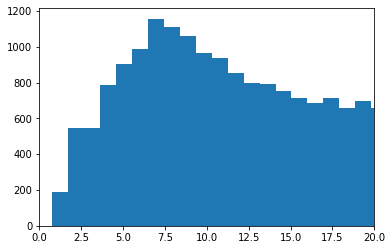

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0, 20))
hist, bins, bars = ax.hist(unfiltered_lepton_plot_arrays[0], 1000)

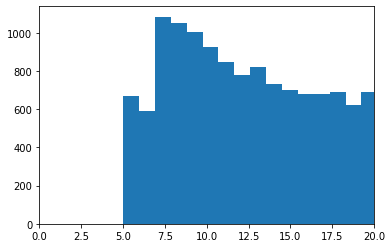

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0, 20))
hist, bins, p = plt.hist(filtered_lepton_plot_arrays[0], 1000)

If we take a look at the second plot we can see two distict bumps one at 5 and one around 7. The fact that there are no more entries under 5 is clear, as they got filtered out. However there is another spike around 7 that was not there before. This is due to the filteing of the muons starting at 7GeV. Because of this it would be nice to see the fraction of electrons vs muons in the histogram. For that we need to adapt the histogram to show stacked histogarms and we need to filter out electrons and muons. So let's do that.

In [61]:
# wrap the pipeline up to this point in a function so it is easy to work with
def raw_to_filtered_and_unfiltered_lepton_events(raw_data, muon_pt_min, muon_max_eta, electron_pt_min, electron_max_eta):
    prepared_data = map(calc_pseudorapidity, map(calc_pt, read_in_and_reformat(raw_data)))
    main_stream, unfiltered_stream = itt.tee(prepared_data, 2)
    filtered_stream = filter_out_unfit_leptons(main_stream, muon_pt_min, muon_max_eta, electron_pt_min, electron_max_eta)
    return filtered_stream, unfiltered_stream


# write the function to plot the stacked histogram
def plot(electron_energies, muon_energies, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim((0, 20))
    hist, bins, bars = ax.hist([electron_energies, muon_energies], bins=1000, stacked=True, color=['blue', 'darkblue'], label=['electrons', 'muons'])
    plt.legend()
    plt.title(title)
    plt.show()

In [62]:
# so lets prepare (raw_to_filtered_lepton_events allready does the splitting)
filtered_stream, unfiltered_stream= raw_to_filtered_and_unfiltered_lepton_events(bkgnd_sim_2el2mu.head(10000).iterrows(),
                                                                                 muon_pt_min,
                                                                                 muon_max_eta,
                                                                                 electron_pt_min,
                                                                                 electron_max_eta)

filtered_leptons, unfiltered_leptons = (extract_leptons(filtered_stream), extract_leptons(unfiltered_stream))

# now lets split each filtered and unfiltered lepton stream into muon and electron stream
# note these streams still contain both lepton types
filtered_lepton_stream1, filtered_lepton_stream2 = itt.tee(filtered_leptons)
unfiltered_lepton_stream1, unfiltered_lepton_stream2 = itt.tee(unfiltered_leptons)

filtered_muons, filtered_electrons = (filter(lambda l: l['type'] == 'mu', filtered_lepton_stream1), filter(lambda l: l['type'] == 'e', filtered_lepton_stream2))
unfiltered_muons, unfiltered_electrons = (filter(lambda l: l['type'] == 'mu', unfiltered_lepton_stream1), filter(lambda l: l['type'] == 'e', unfiltered_lepton_stream2))

# extract the data from the leptons
uf_mu_energies, uf_el_energies = (extract_plot_data_for_leptons(unfiltered_muons, ['pt']), extract_plot_data_for_leptons(unfiltered_electrons, ['pt']))
f_mu_energies, f_el_energies = (extract_plot_data_for_leptons(filtered_muons, ['pt']), extract_plot_data_for_leptons(filtered_electrons, ['pt']))

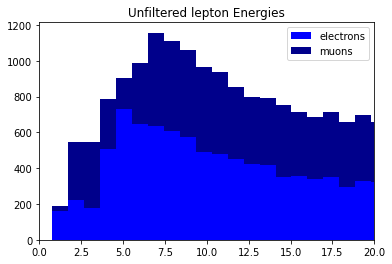

In [63]:
plot(list(uf_mu_energies)[0], list(uf_el_energies)[0], 'Unfiltered lepton Energies')

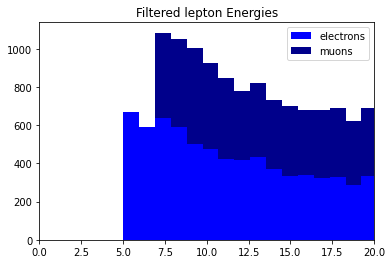

In [64]:
plot(list(f_mu_energies)[0], list(f_el_energies)[0], 'Filtered lepton Energies')

And as we can see our filter works and we have been able to easily extract the neccessary values from the datastream to plot it (without the function definition it was only **8 lines** of code after all). Because we can split the stream off from any point in the pipeline, we can plot the same quantitiy over various steps without any extra code (except for say data conversion code if the format changed during the analysis process). We could also extract data from the pipeline with a similar mechanism and write it to disk rather than plot it. This is particularly useful if ther is a lot of data or there is allready a tool available to handle that aspect. It could technically also be piped directly into the tool via the operating system, but I'd generally not do that as it has a host of timing and buffer related issues that comes with it, however it still is an a possibility.

# Continuing with the filtering process
After this brief excursion into the land of plotting datastreams, we shal return to the task at hand, and that is finding the higgs boson after all.
So the next thing we need to check is that we have charge parity in every event. That means that we can construct a combination of four leptons that don't have net charge. That is due to the Z boson not being charged and of course charge conservation being a fairly well established concept.

By now you should know the drill, write a funciton that says `True` or `False` for an event and let the `filter` do the rest. If you need extra parameters wrap everything in a `lambda` before you throw it in the `filter` function and you are done.

Lucky for you, I've allready written just that function and listed it in the cell below for your viewing pleasure:

In [65]:
def combined_charge_criteria(leptons, num_of_leptons_considered):
    """function checks if a neutral charge combination can be built from a (sub)set of leptons with length
    num_of_leptons_considered (! the sequence of leptons in the event does not matter !)
    """
    for combination in itt.combinations(leptons, num_of_leptons_considered): # itertools to the rescue (again) (you should know where to find the docs by now)
        if sum([l['charge'] for l in leptons]) == 0:
            return True
    return False

If we take a look at the 2el2mu channel, we may notice that the electrons and muons must individually fulfill the combined charge criteria. So for that channel we again need to split the leptons of the event into the electrons and the muons and then apply the combined charge criteria to each lepton type individually and logically and the results. So we will wrap the function above so that this task can also be accomplished.

In [66]:
def combined_charge_criteria_for_2el2mu_channel(event):
    electrons, muons = filter(lambda l: l['type'] == 'e', event[1]['leptons']), filter(lambda l: l['type'] == 'mu', event[1]['leptons'])
    return combined_charge_ciriteria(electrons, 2) and combined_charge_criteria(muons, 2)

Now we build the filter part from the function. As we have allready defined a function that gets the data preprocessed up to here we can attach that function to the three streams coming from that function.

I would also like to say a quick word on the way to the style of code when processing three streams simultaneously. It can be done one line for one stream. I think however that that breaks the Idea that one 'logical' line in the code does one step so I use tuple unpacking and write the three function calls as part of a tuple and unpack the tuple on the other side of the assignment. You will see what I mean. I also allready have used the technique for the preperation of the filter data.

In [81]:
c4mu, c4el, c2el2mu = read_in_reformat_split_and_filter_into_channels(
                              map(add_electron_entries_to_raw_data, bkgnd_sim_4mu.head(10000).iterrows()),
                              muon_pt_min,
                              muon_max_eta,
                              electron_pt_min,
                              electron_max_eta)

c4mu, c4el, c2el2mu = (filter(lambda e: combined_charge_criteria(e[1]['leptons'], 4), c4mu),
                      filter(lambda e: combined_charge_criteria(e[1]['leptons'], 4), c4el),
                      filter(combined_charge_criteria_for_2el2mu_channel, c2el2mu))

As it is possible to see in the cell above we are using the background simulation for what we are doing. As we are only interested in the signal events we actually want to reduce the background as far as possible. So after every filter step the number of events in the simulated background should decrease. The less background events after each filter the better. When we look at the signal however we hope to see that most of our simulated signal passes the tests without loosing to many events. So as you might expect the more signal after the filter the better (but it of course should never be more events than you started with, now that would be strange). Let's take a look then.

---

A quick sidenote here, as I don't want to reprocess the events over and over from start to this point, I'll store this intermediate result in a list so that I can use that list in all further tasks, so everytim you see that list you can think of the pipeline having run up to the point indicated by the code above

---

In [82]:
# this part is the background
bkgnd4mu = list(c4mu)
bkgnd4el = list(c4el)
bkgnd2el2mu = list(c2el2mu)

print(len(bkgnd4mu))
print(len(bkgnd4el))
print(len(bkgnd2el2mu))

7436
0
0


In [83]:
# this is the signal exposed to the same filtering treatment
c4mu, c4el, c2el2mu = read_in_reformat_split_and_filter_into_channels(
                              map(add_electron_entries_to_raw_data, sig_sim_4mu.head(10000).iterrows()),
                              muon_pt_min,
                              muon_max_eta,
                              electron_pt_min,
                              electron_max_eta)

c4mu, c4el, c2el2mu = (filter(lambda e: combined_charge_criteria(e[1]['leptons'], 4), c4mu),
                      filter(lambda e: combined_charge_criteria(e[1]['leptons'], 4), c4el),
                      filter(combined_charge_criteria_for_2el2mu_channel, c2el2mu))

sig4mu = list(c4mu)
sig4el = list(c4el)
sig2el2mu = list(c2el2mu)

print(len(sig4mu))
print(len(sig4el))
print(len(sig2el2mu))

8186
0
0


In [84]:
bkgnd4mu[0]

(0,
 {'run': 194533.0,
  'event': 1142211,
  'leptons': [{'p': array([ 52.8881  , -49.2137  ,   0.527564, -19.3616  ]),
    'type': 'mu',
    'charge': 1.0,
    'dxy': -0.000377091,
    'dz': -0.000987451,
    'relPFIso': 0.0296542,
    'SIP3d': 0.341185,
    'pt': 49.21652762501735,
    'eta': -0.23979059080346196},
   {'p': array([104.397 ,  16.0997, -27.1821,  99.5022]),
    'type': 'mu',
    'charge': -1.0,
    'dxy': -0.000857253,
    'dz': 0.00553847,
    'relPFIso': 0.0,
    'SIP3d': 1.17472,
    'pt': 31.592196829280486,
    'eta': 1.8404167807158787},
   {'p': array([ 29.9594,  24.2971,  11.0576, -13.599 ]),
    'type': 'mu',
    'charge': -1.0,
    'dxy': 0.00163948,
    'dz': 0.000673754,
    'relPFIso': 0.0445055,
    'SIP3d': 0.74423,
    'pt': 26.694935590295024,
    'eta': 0.018669572037864745},
   {'p': array([60.5544 , 14.3324 , -1.76615, 58.8072 ]),
    'type': 'mu',
    'charge': 1.0,
    'dxy': -0.00102962,
    'dz': -0.00563673,
    'relPFIso': 0.0,
    'SIP3d': 0.

In [85]:
sig4mu[0]

(0,
 {'run': 1.0,
  'event': 105642,
  'leptons': [{'p': array([ 79.9449,  23.286 , -74.8249,  15.8164]),
    'type': 'mu',
    'charge': 1.0,
    'dxy': -0.00312021,
    'dz': -0.00676288,
    'relPFIso': 0.0073249,
    'SIP3d': 1.51874,
    'pt': 78.3645548447128,
    'eta': -0.9071771615996637},
   {'p': array([ 40.1922 , -25.734  ,   5.08852,  30.4511 ]),
    'type': 'mu',
    'charge': -1.0,
    'dxy': -0.000252894,
    'dz': -0.00102557,
    'relPFIso': 0.135003,
    'SIP3d': 0.334146,
    'pt': 26.232266234361074,
    'eta': 0.8422791101464281},
   {'p': array([14.2117 ,  3.05392, 12.0237 ,  6.933  ]),
    'type': 'mu',
    'charge': -1.0,
    'dxy': -0.000425921,
    'dz': 0.00159733,
    'relPFIso': 0.123825,
    'SIP3d': 0.59517,
    'pt': 12.40547415685511,
    'eta': 0.11130196106347652},
   {'p': array([ 13.443   , -11.1535  ,  -0.720168,   7.46879 ]),
    'type': 'mu',
    'charge': 1.0,
    'dxy': -0.00113233,
    'dz': 0.00157865,
    'relPFIso': 0.166812,
    'SIP3d': 

The good news, there are more signal events then there are background events, so that is good. The bad news is that there is still very large amounts of background left. So our **SNR** or signal to noise ratio is still pretty low. The higher the SNR the easier it is to find what we are looking for.

---
Same disclaimer as above, only this time for the signal and not the background (note the different input into the pipeline here versus the one above)

---

To try and increase the signal to noise ratio, we can impose stricter reqirements on the transverse momentum of the leptons. This is done in the following funciton.

In [86]:
def strict_pt(leptons):
    """applies strict pt requirements to the leptons"""
    pt = [l['pt'] for l in leptons]
    pt = sorted(pt)
    if pt[-1] < 20:
        return False
    if pt[-2] < 10:
        return False
    for momentum in pt[:-2]:
        if momentum < 4:
            return False
    return True

What follows is again the usual dance of wrapping `strict_pt_in_event` in a `lambda` and putting that into the `filter` and then passing the stream through it.

In [94]:
f1bkgnd4mu, f1bkgnd4el, f1bkgnd2el2mu = (filter(lambda e: strict_pt(e[1]['leptons']), bkgnd4mu),
                                   filter(lambda e: strict_pt(e[1]['leptons']), bkgnd4el),
                                   filter(lambda e: strict_pt(e[1]['leptons']), bkgnd2el2mu))

In [95]:
print(len(list(f1bkgnd4mu)))
print(len(list(f1bkgnd4el)))
print(len(list(f1bkgnd2el2mu)))

7149
0
0


In [96]:
f1sig4mu, f1sig4el, f1sig2el2mu = (filter(lambda e: strict_pt(e[1]['leptons']), sig4mu),
                                   filter(lambda e: strict_pt(e[1]['leptons']), sig4el),
                                   filter(lambda e: strict_pt(e[1]['leptons']), sig2el2mu))

In [97]:
print(len(list(f1sig4mu)))
print(len(list(f1sig4el)))
print(len(list(f1sig2el2mu)))

8120
0
0


So as you can see the strict pt filter removed roughly 300 events from our background but only a few dozen from our signal events, thus making the SNR larger.

Looking at this strict filter criteria, It still could be made a bit more efficient. We filtered out events that did not have a combinations of leptons where it was not possible to arrange the leptons in such a manner so that the sum of the charge was 0. We could have also added a list of tuples to the event where the numbers in the tuples would indicate the lepton that was part of a combination that had net 0 charge. Every tuple represents a combination that has net zero charge. If we had done that we could have now checked the strict pt_criteria for every possible combination and then filtered out the combinations that did not match the strict criteria and again eliminated all events that had an empty combinations list.

I am doing this because the next step is Z boson mass reconstruction, where we want to know the mass of the (virtual) Z boson from which the leptons emerged. This reconstruction can be done for every combination and then the combination with the most fitting masses can be selected and all others discarded. then from the 

In [76]:
def mandelstam_s(fourvectors):
    vec = np.add.reduce(fourvectors)
    minkovski_metric = np.diag(1, -1, -1, -1)
    return vec @ (minkovski_metric @ vec)

---

# The pros and cons of using Python
After you have now seen the power of functional programming in python I would like to discuss with you the different aspects of using python for such a task. We have demonstrated that such a thing *can* be done with python, but that does not mean it *must* be done in python. There are powers to this method that python simply can't use because of how python itself works and I will go into the most important two here and discuss alternatives to python and their pros and cons in turn.

I wan't to warn you here, that I am somewhat oppinionated what this topic is concerned. I don't want to tell you what to do or not to do. This method however has worked for me time and time again and 'just works' in nearly every data processing task I have encountered. Compunding this is the efficiencies that can be acheived when using not only the right methods but right tools. These things are important to me but not need to be important to you which is why you may come to a vastly different conclusion than me and that is totally fine. You (hopefully) make concious choices what tools to use for the job and how to go about your business. This part is meant to give a (maybe differing) perspective and offer reasons for that perspective. In the end it is up to you to choose how to do the things you want to do.

Secondly I would like to stress that there are different tasks that profit from a different view on the data and data processing. Most namely here is the training of neural networks. As you may have noticed the previous code has mostly been focused on single events and the whole Idea of pipelines is that there is a queue of events and the events are fed into the front of the pipeline the pipeline produces some desired output from the input, if neccessary by aggregating the individual events at different stages. Neural networks need to see all the data 'simultaneously' during training to be able to see patterns and correlations that would go unnoticed where it only to look at one event at a time. This is where a 'column oriented view', so a view that emphesizes a single quantity for all events (if you would group events as rows and the properties of such an event as columns (like the dataframe in the beginning) it is understandable where the term 'column oriented view' comes from) is more helpful. For me it is important to emphesize that the task of training a neural network (at least to me) is a different task of designing a data processing pipeline and needs to be treated with different considerations. This 'functional style' is not and should not be the cure to all data processing problems.

It is also worth noting that the job of a scientist mostly involves the development of ideas and not the production of a ready to use product (like a command line tool or a usable library). Scientists tend to use computers as tools to prove that their Idear works and as soon as it does a paper gets written and the code (at least this seems to be the case that I see) is abandoned afterwards.
I have some problems with this because of the way I think about things and the habbits I have developed. This is not to say that this practice is not a valid way of conducting science. I just think that too much is 'implied by the author' meaning that the author has (in my oppinion that is) too many assumptions about her/his audience. I don't like implied things because I tend to think about things differently than others (and have done so for a long time) and this means that I often don't fit the assumptions of other authors and have to work hard to then figure out what I need to know to be able to understand what I am reading. This is why in science especially I prefer explicit statements and clean readable and most importantly understandable code because it is vital to transport the Idea with all of it's possible inticacies.
I beleive science has the duty to communicate it's findings as clearly and understandably as possible. But as this is not the reality most of us live in (I mean there are allways new papers to publish and the quality of a paper is not neccesarilt measured in it's approachableness but in it's accuracy and conciceness (which implies prior knowledge in the field)) I can only try to convince you that the extra work put into explaining the Idea is worth your time. I beleive explicit writing comes with a host of benefits that I feel the 'need for speed' in the scientific realm and this 'first to publish gets the credit of discovery' thing disincentivies. Propper communication  of an idea is for me just as important as the idea itself. As scientsist it is all we do, that is think up Ideas and communicate them to others.
I have tried and would like to see effort put in the clear communication of the ideas expressed in computer code. This is facilitated by the use of clear and concice coding style and the use of a fitting way to express ones problem in code. I hope I have been explicit enough that you where able to understand the ideas expressed in the code above and that you have able to gain something from this document. I hope to have empowered you to do cool things with this and other ideas. In turn I hope that you will take the time (just as I have) to express your idears with the care they deserve so that they may bear fruit in others minds to collectively advance our understanding of the universe, one tiny step at a time.

So after this lengthy motivation, on to the things I would like to say:
## Python is not parallel
As you have seen a pipeline is made up of many different steps, (i'll switch analogies now) like a conveir belt passing the item to be produces (I'll use a car for this) through various different stations, in a pipeline data is similarly passed through various different stations. Each station performs a specific action on the data (mostly it either calculates a new property for the value or filters the data depending on a specific property). As each station only acts uppon one item at a time and then passes that item along to the next station, in principle there is nothing stopping us from running our data processing job the same way Toyota or Ford run their factories, effectively having every station running in parrallel on different items. As long as each station knows where to pass the item to when it is done parallelisation is trivial. On top of that we have the benefit of being able to simply open up new assembly lines if we want more data to be processed (just as Ford or Tesla would open a new factory to be able to produce more cars). As long as there is enough input to feed the pipelines with, it is trivial to have the processing run on a million cores all at once. Using this mental model, python will quickly throw a wrench in the proverbial conveir belt.

### Meet the GIL
The GIL (or more commonly known as the <u>G</u>lobal <u>I</u>nterpreter <u>L</u>ock) is something that is baked deep into the core of python. Let me explain.

As you may have noticed, there is no memory management in python. What is memmory management you ask, well here is a short summary:

- Memmory management is the task of tracking if a value or variable is still needed by the running program and dealing with the value in such a way that it is available when needed and that the variable has the value that the program would imply at the point where the value is needed. This is a bit more of a problem than it is made out to be. Memmory management means that all values and variables have to be tracked through the entire programs lifetime. It should not be able to alter the content of a variable in an unforseen way and last but not least the program should only need as much memmory as neccesary to perform it's task.

The second requirement is the triky one for python. Namely making sure the variable has the value that the programmer was expecting when they wrote the code. To help you understand I'll show you an example:

```python
x = 5
print(x)
x = 42
```

Reading this code (or imagine you are the programmer and you have just written these three lines of code) you would expect python to print the following line

```
5
```

In a truly parallel environment however two or more python interpreters would be operating on the same data. this means that if python interpreter no. 1 executes the first line and the python interpreter no. 2 executes the third line before no. 1 can execute the second line we would automatically get the following output

```
5
42
```

The first five comes from interpreter no. 2 that has executed line 1 and 2. Interpreter no. 1 is a bit slower (I'm not going into detail why here, so you best trust me that this is indeed something that is likely to happen, or at least likely enough that it can't be ignored) so during that time it was only able to execute line 1. Now No. 1 starts to interpret line 2 and starts working through the code of the `print` statement, but has not read the value of x yet. Now No 2. arrives at the third statement and changes `x` according to the statement to the value `42`. Now that No. 1 arrives at the point in the `print` statement where it wants to read `x` it does so but because No. 2 has allready changed the value to `42` it prints the second line of the output. After line 3 No. 2 is done and shuts down. No. 1 finally also sets `x` to `42` (which is redundant at this point but computers are stupid and do what they are told) and also shuts down.

From this you can see that if truly parrallel programs operate on the same data mechanisms are needed to keep those kind of things from happening. As python does not force it's programmers to declare anything about the variables they are using and deducing that from the code written would mean that python could effectively not operate in interactive mode (along with a host of other considerations like execution time and so forth), the c-python developers opted for restricting a single running interpreter. So with that restriction the situation above is impossible as there can't be a No. 2 interpreter. On the other hand there cannot be a conveir belt style factory either as we cant have the different stations running in parallel. There is not enough 'snakes' to run such a factory (we have restricted ourselves to only one snake per factory after all). And if we need one snake to run one station, that means that only one station can be running in at a time (and the poor snake has to slither from one station to the next over and over (this is more of a real concern than you might think)).

### Remedies for this while still using python
We can't have multiple 'snakes' in one factory, or in more technical terms, we can't have more than one thread in a process. However the operating system is more than happy enough to let us start up more than one process. This means that we still can have more than one factory, each run by a single snake. That means that we still can spawn one process for each processor core of our computer, fully using the hardware that is there to be used. As we are effectively running the same program in parallel, we can increase performance by a factor equal to the number of cores available for the process. The thing is that moving data between processes and the snake slithering from one station to the next still causes delays that can be reduced, but the GIL is stopping us from being able to attack those problems.

## Python is... well... slow!
Python has some really cool features: well built and supported libraries, a clean and readable syntax that gets out of your way, automatic memmory management (that restricts us as you have seen in the previous section), support for different programming styles, interactive sessions ....

It however is also rather slow, especially when compared to high performance code that the kind of things like data analysis pipelines for terrabytes of data usually should be. This is due to a few things (that are also some of the strengths of python) Let me again explain ...

### Python is ... interpreted
The main reason that python is slow compared to languages like C or Fortran (frankly these examples are actually some of the fastest languages out there) and this is due to the fact that python is closer to a [shell script](https://en.wikipedia.org/wiki/Shell_script) than an 'actual' program. With 'actual' program I don't want to imply that writing python code is not programming, nor do I want to communicate that python is somehow less able (in terms of functionality as opposed to performance) than C or FORTRAN code. In terms of features, python clearly wins out against these languages (at least in my oppinion). 